##### Visualización y familiarización del dataset (4p): Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.

##### Análisis de correlación y de componentes principales: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación

##### Estudio de regresión lineal del median_value: En base al análisis realizado en los puntos 1 y 2 se pide justificar las variables utilizadas para el modelo de regresión así como la validez del modelo

Como comentario sobre la entrega, este ejercicio no tiene una solución única. Muchas opciones pueden ser válidas (Algunas variables pueden ser útiles y otras no tanto), pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de regresión lineal acorde a lo analizado (Si la regresión es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

In [134]:
library(dplyr)
library(MASS)
library(corrplot)
library(class)
library(ggplot2)

El csv adjunto incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

##### crime_index: Índice de criminalidad de la zona
##### urban_ratio: Ratio de zona urbana residencial sobre el total
##### industry_ratio: Ratio de industria de la zona
##### c_river_variable: 1 si la zona colinda con un río y 0 si no
##### nox_concentration: Concentración de óxido nitroso en la zona
##### rooms_per_dwelling: Número de habitaciones medio por vivienda
##### dwelling_age: “Edad” media de la vivienda
##### dwelling_dist: Distancia media ponderada con los centros urbanos de la ciudad
##### highway_index: Índice de accesibilidad sobre autopistas cercanas
##### tax_ratio: Índce de tasas por cada 10000dollars
##### teacher_ratio : Ratio de alumno por profesor
##### racial_index: Índice de proporción de población no caucásica
##### lower_status: Porcentaje de población de “clase-baja”
##### median_value: Valor medio de precio de la vivienda (En 1000dollars)

# Visualización y familiarización del dataset

In [3]:
Boston<-read.csv(file="datos_ciudad.csv", sep=",", head=TRUE)
head(Boston)
tail(Boston)
summary(Boston)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8,0
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,0


  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist   
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 3.207  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12.127  

In [10]:
#Separamos por si hay rio o no a ver si influye en el precio
Rio<-data.frame(Boston$c_river_variable, Boston$median_value)
Bostonrio<-filter(Rio,Boston$ c_river_variable==1,)
head(Bostonrio)
Bostonsinrio<-filter(Rio,Boston$c_river_variable==0,)
head(Bostonsinrio)
countrio<-sum(Bostonrio$Boston.c_river_variable ==1)
countsinrio<-sum(Bostonsinrio$Boston.c_river_variable ==0)
print(countrio)
print(countsinrio)
summary(Bostonrio)
summary(Bostonsinrio)

,Boston.c_river_variable,Boston.median_value
,<int>,<dbl>
1,1,13.4
2,1,15.3
3,1,17.0
4,1,15.6
5,1,27.0
6,1,50.0


,Boston.c_river_variable,Boston.median_value
,<int>,<dbl>
1,0,24.0
2,0,21.6
3,0,34.7
4,0,33.4
5,0,36.2
6,0,28.7


[1] 35
[1] 471


 Boston.c_river_variable Boston.median_value
 Min.   :1               Min.   :13.40      
 1st Qu.:1               1st Qu.:21.10      
 Median :1               Median :23.30      
 Mean   :1               Mean   :28.44      
 3rd Qu.:1               3rd Qu.:33.15      
 Max.   :1               Max.   :50.00      

 Boston.c_river_variable Boston.median_value
 Min.   :0               Min.   : 5.00      
 1st Qu.:0               1st Qu.:16.60      
 Median :0               Median :20.90      
 Mean   :0               Mean   :22.09      
 3rd Qu.:0               3rd Qu.:24.80      
 Max.   :0               Max.   :50.00      

Podemos observar como el precio medio de las viviendas que tienen un rio colindante es superior a las viviendas que no lo tienen. Exactamente la media es 6.35 unidades superior si hay rio colindante. El problema es que tal vez tenemos muy pocas instancias de viviendas colindantes a un rio. Pero ya veremos más adelante si se puede trabajar con ello con resultados significativos. Por último, especificar que la variable “class” no tenemos información alguna de ella y no parece que tenga mucho sentido a primera vista.

In [6]:
#Podemos limpiar la columna class que no aporta nada especial ni aparece en la descripción de los datos y de moemento la del rio
Bostonf<-data.frame(Boston$crime_index, Boston$urban_ratio, Boston$industry_ratio, Boston$nox_concentration, 
                    Boston$rooms_per_dwelling, Boston$dwelling_age, Boston$dwelling_dist, Boston$highway_index, Boston$tax_ratio,
                   Boston$teacher_ratio, Boston$racial_index, Boston$lower_status, Boston$median_value)
head(Bostonf)
names(Bostonf)

,Boston.crime_index,Boston.urban_ratio,Boston.industry_ratio,Boston.nox_concentration,Boston.rooms_per_dwelling,Boston.dwelling_age,Boston.dwelling_dist,Boston.highway_index,Boston.tax_ratio,Boston.teacher_ratio,Boston.racial_index,Boston.lower_status,Boston.median_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] "Boston.crime_index"        "Boston.urban_ratio"       
 [3] "Boston.industry_ratio"     "Boston.nox_concentration" 
 [5] "Boston.rooms_per_dwelling" "Boston.dwelling_age"      
 [7] "Boston.dwelling_dist"      "Boston.highway_index"     
 [9] "Boston.tax_ratio"          "Boston.teacher_ratio"     
[11] "Boston.racial_index"       "Boston.lower_status"      
[13] "Boston.median_value"

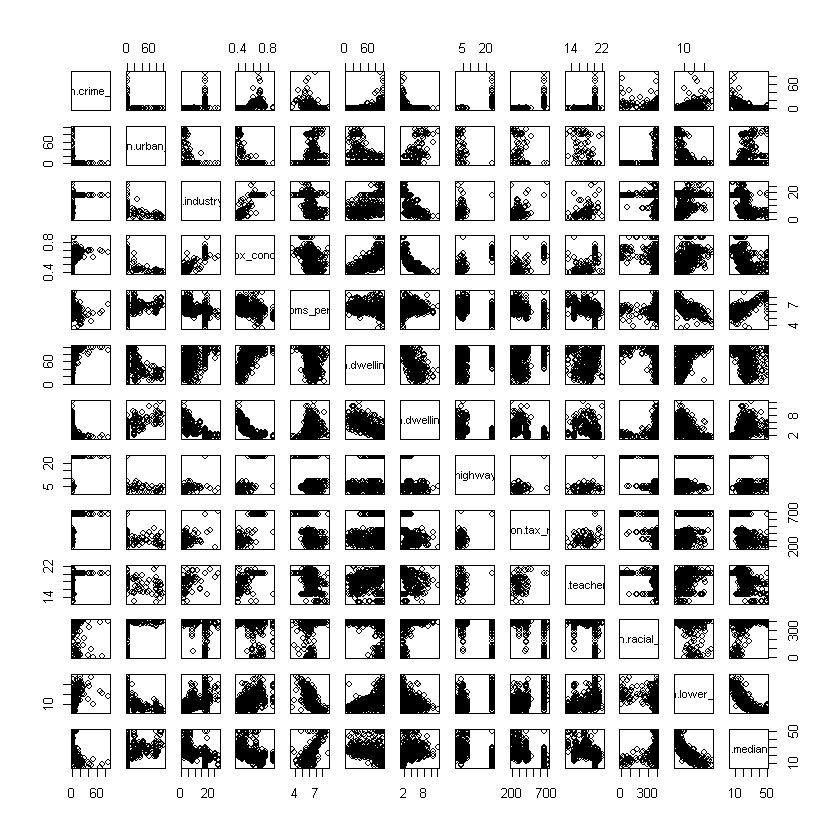

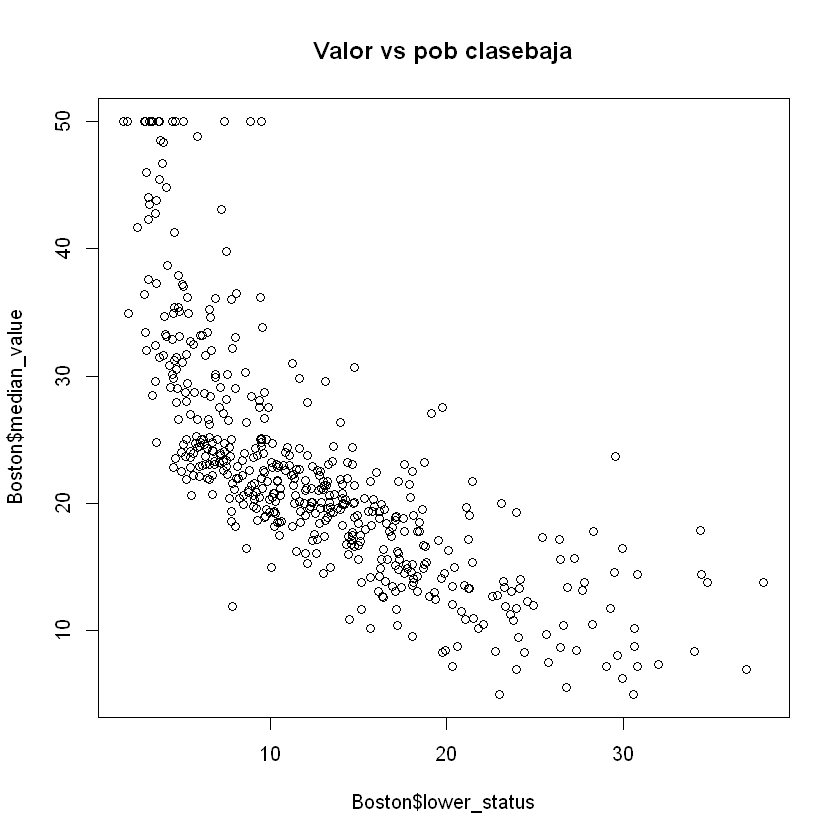

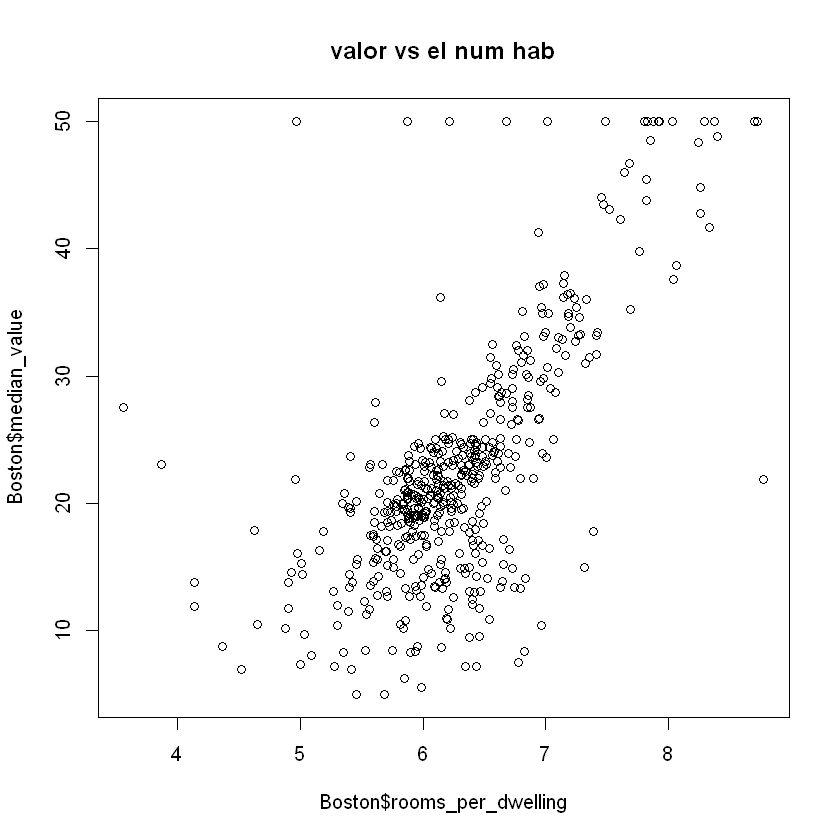

In [146]:
# Visualización y familiarización del dataset
pairs(Bostonf)
plot(y=Boston$median_value, x=Boston$lower_status, main="Valor vs pob clasebaja")
plot(y=Boston$median_value, x=Boston$rooms_per_dwelling, main="valor vs el num hab")

Realizando la función “pairs”, podemos ver una ligera representación de todos los datos entre sí para estudiar la relación que tiene la variable "median_value" respecto a las demás y así poder hacerte una idea de que variables tienen más relación. En este caso se observa claramente como hay dos variables que respecto a "median_value" tienen bastante relación lineal. Para poder tener una mejor visualización de estas las representamos y observamos que tienen una gran relación y tiene sentido. El precio medio de las viviendas será superior dependiendo del número de habitaciones que esta tenga y también dependerá del índice de gente de "clase baja" que viva en el barrio.

# Análisis de correlación y de componentes principales

,Boston.crime_index,Boston.urban_ratio,Boston.industry_ratio,Boston.nox_concentration,Boston.rooms_per_dwelling,Boston.dwelling_age,Boston.dwelling_dist,Boston.highway_index,Boston.tax_ratio,Boston.teacher_ratio,Boston.racial_index,Boston.lower_status,Boston.median_value
Boston.crime_index,1.0000000,-0.2004692,0.4065834,0.4209717,-0.2192467,0.3527343,-0.3796701,0.6255051,0.5827643,0.2899456,-0.3850639,0.4556215,-0.3883046
Boston.urban_ratio,-0.2004692,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.6644082,-0.3119478,-0.3145633,-0.3916785,0.1755203,-0.4129946,0.3604453
Boston.industry_ratio,0.4065834,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997,-0.4837252
Boston.nox_concentration,0.4209717,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789,-0.4273208
Boston.rooms_per_dwelling,-0.2192467,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083,0.6953599
Boston.dwelling_age,0.3527343,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385,-0.3769546
Boston.dwelling_dist,-0.3796701,0.6644082,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,0.2915117,-0.4969958,0.2499287
Boston.highway_index,0.6255051,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763,-0.3816262
Boston.tax_ratio,0.5827643,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934,-0.4685359
Boston.teacher_ratio,0.2899456,-0.3916785,0.3832476,0.1889327,-0.3555015,0.2615150,-0.2324705,0.4647412,0.4608530,1.0000000,-0.1773833,0.3740443,-0.5077867


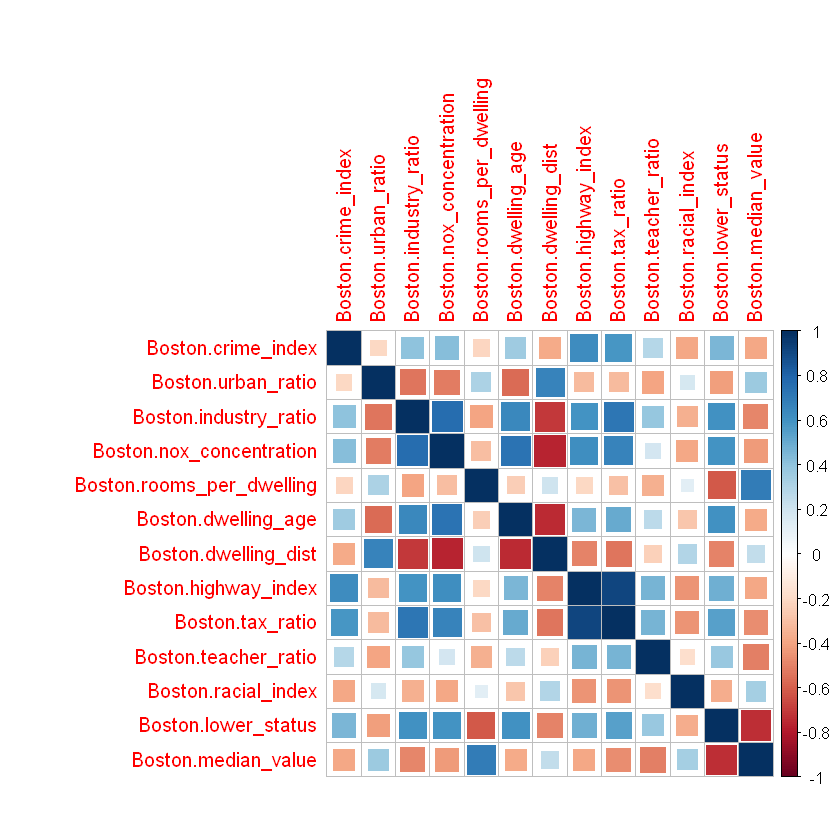

In [145]:
corrplot::corrplot(cor(Bostonf), method="square")
cor(Bostonf)

Observamos como claramente las dos variables representadas al principio tienen mucha más relación que las demás variables. Esto es debido a que su valor de correlación es bastante más elevado respecto a las demás. La primera gráfica (Valor vs pob clasebaja) tiene una correlación de -0.74 y la segunda gráfica (valor vs num hab correlación) tiene una correlación de 0.70. La correlación que puede ser significativa de las otras variables es de -0.51 (valor vs la ratio de profes), -0.48 (valor vs ratio industria) y de -0.47 (valor vs el índice de tasas). 

Podemos decir que hay una dependencia bastante clara entre (Corr>0.6):

- Valor medio del precio de la viviendo con el porcentaje de población de "clase baja"
- Valor medio del precio de la vivienda con el número de habitaciones medio por vivienda

Y una dependencia no tan fuerte entre (0.45<Corr<0.6):

- Valor medio del precio de la vivienda con la ratio de alumno por profesor
- Valor medio del precio de la vivienda con la ratio de industria de la zona
- Valor medio del precio de la vivienda con el índice de tasas por cada 1000 dólares

Vamos a probar de realizar una predicción con un modelo de regresión del precio de la vivienda o al menos poder tener un valor no exacto pero estimado del precio dependiendo del número de habitaciones, la población de "clase baja", la ratio de alumno por profesor, el ratio de industria de la zona y el índice de tasas por cada 1000 dólares.
También, a más a más, haré un test para saber si es cierto o no que el precio medio de las viviendas colindantes a un río son más caras que las demás.

In [78]:
#Crearemos la tabla con las variables de estudio
TablaBoston1=c("lower_status","rooms_per_dwelling","teacher_ratio","industry_ratio", "tax_ratio","median_value","c_river_variable")
TablaBoston<-Boston[TablaBoston1]
head(TablaBoston)
Bostonrio1<-Boston[Boston$c_river_variable ==1,]
Bostonsinrio1<-Boston[Boston$c_river_variable == 0,]
TablaBostonrio<-Bostonrio1[TablaBoston1]
TablaBostonsinrio<-Bostonsinrio1[TablaBoston1]
head(TablaBostonrio)
head(TablaBostonsinrio)
head(Boston) #Comprobar que los valores concuerdan

,lower_status,rooms_per_dwelling,teacher_ratio,industry_ratio,tax_ratio,median_value,c_river_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,4.98,6.575,15.3,2.31,296,24.0,0
2,9.14,6.421,17.8,7.07,242,21.6,0
3,4.03,7.185,17.8,7.07,242,34.7,0
4,2.94,6.998,18.7,2.18,222,33.4,0
5,5.33,7.147,18.7,2.18,222,36.2,0
6,5.21,6.430,18.7,2.18,222,28.7,0


,lower_status,rooms_per_dwelling,teacher_ratio,industry_ratio,tax_ratio,median_value,c_river_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
143,26.82,5.403,14.7,19.58,403,13.4,1
153,12.12,5.012,14.7,19.58,403,15.3,1
155,15.12,6.129,14.7,19.58,403,17.0,1
156,15.02,6.152,14.7,19.58,403,15.6,1
161,5.50,6.250,14.7,19.58,403,27.0,1
163,1.92,7.802,14.7,19.58,403,50.0,1


,lower_status,rooms_per_dwelling,teacher_ratio,industry_ratio,tax_ratio,median_value,c_river_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,4.98,6.575,15.3,2.31,296,24.0,0
2,9.14,6.421,17.8,7.07,242,21.6,0
3,4.03,7.185,17.8,7.07,242,34.7,0
4,2.94,6.998,18.7,2.18,222,33.4,0
5,5.33,7.147,18.7,2.18,222,36.2,0
6,5.21,6.430,18.7,2.18,222,28.7,0


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [79]:
PCA<-princomp(TablaBoston, scores=T)
summary(PCA)

Importance of components:
                            Comp.1      Comp.2       Comp.3       Comp.4
Standard deviation     168.5461472 9.437751252 4.7111046500 3.7006875444
Proportion of Variance   0.9955026 0.003121345 0.0007777683 0.0004799208
Cumulative Proportion    0.9955026 0.998623904 0.9994016722 0.9998815930
                            Comp.5       Comp.6       Comp.7
Standard deviation     1.755892818 4.856207e-01 2.447307e-01
Proportion of Variance 0.000108044 8.264169e-06 2.098851e-06
Cumulative Proportion  0.999989637 9.999979e-01 1.000000e+00

In [80]:
head(PCA$scores)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7
-112.6128,-2.787272,-6.8286793,-1.3432631,-2.8843252,-0.004369698,0.01924569
-166.2441,4.626948,-1.4031257,-2.0982162,-0.3006489,0.165076665,0.04362839
-166.6989,-8.861987,2.3120090,-1.2465596,0.9646152,0.274911312,0.12775683
-186.8078,-8.466883,-2.3260882,-0.2991111,1.7792198,0.089277959,0.06909032
-186.8246,-9.507813,-0.3208532,2.5666643,2.2766638,0.182385230,0.09608445
-186.6342,-3.382007,-3.5072715,-0.2690566,1.3565597,-0.233123442,0.04200250


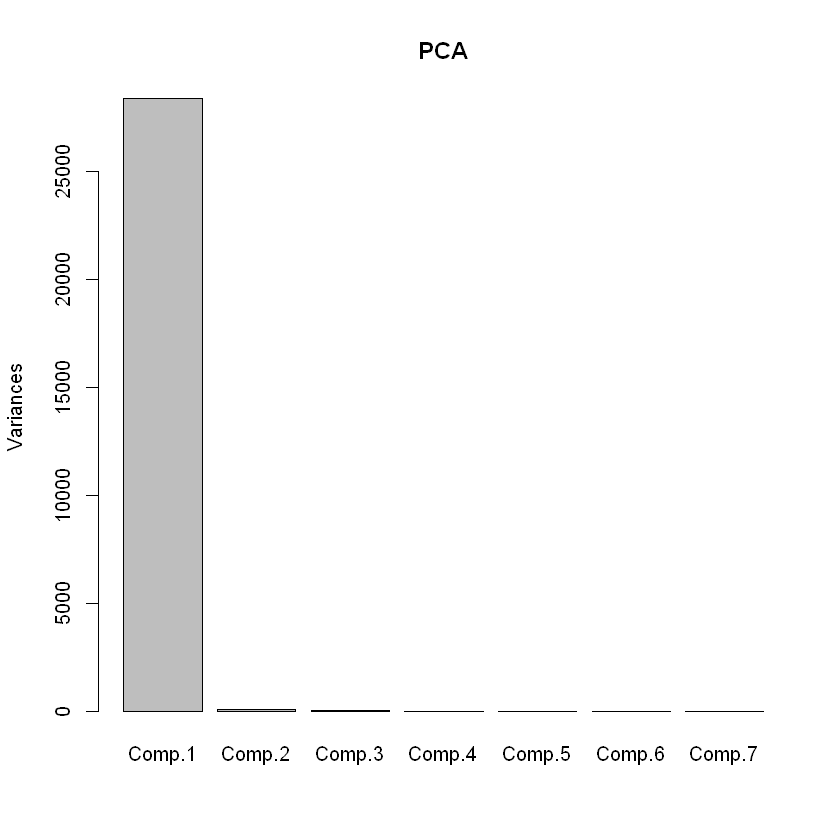

In [81]:
plot(PCA)

Aquí podemos observar como la primera componente es la que agrupa la mayor parte de la varianza del dataset, también es debido a que es la que tiene los valores de scores más elevados.

In [82]:
PCA$loadings


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
lower_status               0.529  0.348  0.771                     
rooms_per_dwelling                                     0.999       
teacher_ratio                           -0.104  0.990              
industry_ratio             0.196  0.836 -0.511                     
tax_ratio           0.999                                          
median_value              -0.821  0.419  0.365  0.123              
c_river_variable                                             -1.000

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

Las cargas (loadings) son como los coeficientes de la combinación lineal de las variables iniciales a partir de las cuales se construyen los componentes principales. Nos están diciendo lo fuerte que es la relación de cada componente con la variable. En este caso observamos como el componente 1 solo tiene relación o se correlaciona con la variable “tax_ratio”, por otra parte, podemos observar cómo “median_value” (la variable que queremos estudiar) solo tiene relación con los componentes 2, 3, 4 y 5. En el caso del componente 5 podemos decir que tiene poca relación ya que es un valor bastante bajo.

Debido a los resultados obtenidos en la PCA las variables escogidas para realizar el modelo son "median_value","industry_ratio","lower_status" y "teacher_ratio", las otras variables ("tax_ratio", "rooms_per_dwelling" y "c_river_variable") las descartamos porque no aportan nada a la "median_value" según el PCA realizado.

#### Comparación PCA rio y no rio***

In [83]:
PCA_rio<-princomp(TablaBostonrio, scores=T)
summary(PCA_rio)
PCA_rio$loadings

Importance of components:
                            Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     162.7001938 12.842225975 4.0641640511 3.8603653984
Proportion of Variance   0.9925701  0.006183946 0.0006193377 0.0005587813
Cumulative Proportion    0.9925701  0.998754089 0.9993734270 0.9999322084
                             Comp.5       Comp.6 Comp.7
Standard deviation     1.232256e+00 5.380658e-01      0
Proportion of Variance 5.693599e-05 1.085565e-05      0
Cumulative Proportion  9.999891e-01 1.000000e+00      1


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
lower_status               0.434  0.315  0.836                     
rooms_per_dwelling                                     0.992       
teacher_ratio                    -0.261  0.176 -0.945              
industry_ratio                    0.879 -0.353 -0.303              
tax_ratio          -1.000                                          
median_value              -0.895  0.241  0.376                     
c_river_variable                                              1.000

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

In [84]:
PCA_norio<-princomp(TablaBostonsinrio, scores=T)
summary(PCA_norio)
PCA_norio$loadings

Importance of components:
                            Comp.1      Comp.2       Comp.3       Comp.4
Standard deviation     168.8669354 8.895003816 4.5903573823 3.6829837422
Proportion of Variance   0.9959155 0.002763284 0.0007359126 0.0004737322
Cumulative Proportion    0.9959155 0.998678816 0.9994147286 0.9998884607
                             Comp.5       Comp.6 Comp.7
Standard deviation     1.7233051251 4.732045e-01      0
Proportion of Variance 0.0001037188 7.820438e-06      0
Cumulative Proportion  0.9999921796 1.000000e+00      1


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
lower_status               0.546  0.304  0.777                     
rooms_per_dwelling                                     0.999       
teacher_ratio                           -0.130  0.987              
industry_ratio             0.240  0.835 -0.493                     
tax_ratio           0.999                                          
median_value              -0.796  0.455  0.370  0.139              
c_river_variable                                              1.000

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

Podemos observar que los resultados al realizar PCA son diferentes de si hay rio colindante o no y divergen entre sí y también son diferentes de la PCA realizada. Más adelante, después de realizar el modelo de regresión intentaré realizar un estudio para prever si la vivienda tiene rio colindante o no.

# Estudio de regresión lineal del median_value

Debido a los resultados obtenidos en el PCA como bien he descrito antes, las variables escogidas seran  "median_value","industry_ratio","lower_status" y "teacher_ratio", las otras variables ("tax_ratio", "rooms_per_dwelling" y "c_river_variable") las descartamos porque no aportan nada a la "median_value" según el PCA realizado. 

Realizaremos varios modelos para ver cuales se ajustan mejor. Primeramente, realizaremos el modelo con todas las variables que influyen en el "median_value" y seguidamente iremos probando con menos variables. Quitaremos las que menos influyen (las que menos correlación tienen con el "median_value" según el PCA realizado) y veremos si mejoran el modelo o aportan más ruido.

In [148]:
#Variables que inflyen segun PCA
Tabla4var<- c("median_value","industry_ratio","lower_status","teacher_ratio")
Tabla3var<-c("median_value","industry_ratio","lower_status")
Tabla2var<-c("median_value","lower_status")

In [149]:
modelo_1<-lm(TablaBoston$median_value ~ . , data=TablaBoston[Tabla4var])
summary(modelo_1)


Call:
lm(formula = TablaBoston$median_value ~ ., data = TablaBoston[Tabla4var])

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1910  -3.6085  -0.8411   1.8905  26.8350 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    54.101955   2.263313  23.904   <2e-16 ***
industry_ratio  0.009079   0.048180   0.188    0.851    
lower_status   -0.824849   0.046098 -17.893   <2e-16 ***
teacher_ratio  -1.150516   0.131228  -8.767   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.785 on 502 degrees of freedom
Multiple R-squared:  0.6067,	Adjusted R-squared:  0.6043 
F-statistic: 258.1 on 3 and 502 DF,  p-value: < 2.2e-16


In [150]:
modelo_2<-lm(TablaBoston$median_value ~ . , data=TablaBoston[Tabla3var])
summary(modelo_2)


Call:
lm(formula = TablaBoston$median_value ~ ., data = TablaBoston[Tabla3var])

Residuals:
    Min      1Q  Median      3Q     Max 
-14.879  -3.900  -1.284   1.906  25.210 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    34.86087    0.59358  58.729   <2e-16 ***
industry_ratio -0.08086    0.05050  -1.601     0.11    
lower_status   -0.90315    0.04852 -18.616   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.206 on 503 degrees of freedom
Multiple R-squared:  0.5465,	Adjusted R-squared:  0.5447 
F-statistic:   303 on 2 and 503 DF,  p-value: < 2.2e-16


In [151]:
modelo_3<-lm(TablaBoston$median_value ~ . , data=TablaBoston[Tabla2var])
summary(modelo_3)


Call:
lm(formula = TablaBoston$median_value ~ ., data = TablaBoston[Tabla2var])

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.55384    0.56263   61.41   <2e-16 ***
lower_status -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


Fijándonos en el R cuadrado de los 3 modelos realizados comprobamos que el que mejor resultado nos ha proporcionado es el primero (el que emplea más variables) con un R cuadrado de 0.61 es decir una precisión del 61%. Cuanto más se acerca al 1 el R cuadrado mejor es el modelo realizado. Los otros dos modelos a medida que hemos quitado variables la precisión a disminuido. Modelo 2 tiene un R cuadrado de 0.55 y el Modelo 3 un R cuadrado de 0.54.

Por lo tanto, si lo que queremos es tener una herramienta que pueda predecir con mucha exactitud el valor medio de la vivienda de Boston tal vez, un R cuadrado de 0.61 no es suficiente, ya que predecir el 61% de los casos no es muy elevado si quieres tener exactitud en los datos predichos. Ahora bien, si lo que queremos es tener una herramienta para hacer aproximaciones y hacernos una idea de los precios medios de las viviendas con una R cuadrado de 0.61 puede ser suficiente.

En mi humilde opinión, creo que un R cuadrado de 0.61 no es suficiente para darle validez al modelo. Yo creo, que debería rondar el R cuadrado 0.75, entonces sí que estaríamos hablando de un modelo robusto y valido de predicción para los precios medios de la vivienda en Boston. 

Cabe destacar que, gracias al estudio realizado, observas que lo que más modifica y influye en el precio sería el "lower_status", "teacher_ratio" y "industry_ratio" y apartir de estos indicadores puedes hacerte una idea de si la vivienda será más o menos cara, aunque no podrás saber con exactitud el precio medio.

También como último, aportar que la variable de rio colindante a mi parecer es significativa e intentaré demostrarlo de alguna forma valida.

# Discusión de si influye si hay rio o no

In [122]:
head(TablaBoston)
BostonPCA=c("median_value","industry_ratio","lower_status","teacher_ratio","c_river_variable")
BostonPCA<-TablaBoston[BostonPCA]
head(BostonPCA)
modelo<-lm(BostonPCA$c_river_variable ~ . , data=BostonPCA)
summary (modelo)

,lower_status,rooms_per_dwelling,teacher_ratio,industry_ratio,tax_ratio,median_value,c_river_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,4.98,6.575,15.3,2.31,296,24.0,0
2,9.14,6.421,17.8,7.07,242,21.6,0
3,4.03,7.185,17.8,7.07,242,34.7,0
4,2.94,6.998,18.7,2.18,222,33.4,0
5,5.33,7.147,18.7,2.18,222,36.2,0
6,5.21,6.430,18.7,2.18,222,28.7,0


,median_value,industry_ratio,lower_status,teacher_ratio,c_river_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,24.0,2.31,4.98,15.3,0
2,21.6,7.07,9.14,17.8,0
3,34.7,7.07,4.03,17.8,0
4,33.4,2.18,2.94,18.7,0
5,36.2,2.18,5.33,18.7,0
6,28.7,2.18,5.21,18.7,0



Call:
lm(formula = BostonPCA$c_river_variable ~ ., data = BostonPCA)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34847 -0.09046 -0.04732 -0.01619  0.97248 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.036928   0.141017  -0.262 0.793530    
median_value    0.007540   0.001902   3.965 8.41e-05 ***
industry_ratio  0.006892   0.002053   3.357 0.000847 ***
lower_status    0.002289   0.002514   0.911 0.362932    
teacher_ratio  -0.009185   0.006004  -1.530 0.126700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2465 on 501 degrees of freedom
Multiple R-squared:  0.06561,	Adjusted R-squared:  0.05815 
F-statistic: 8.795 on 4 and 501 DF,  p-value: 7.224e-07


In [123]:
pred<- predict.lm(modelo,BostonPCA,type="response")
head(pred)

pred$predict<-round(pred,506)
head(pred$predict)

1          2          3          4          5          6 
0.03081861 0.03208782 0.11916575 0.06489965 0.09148256 0.03465742

Warning message in pred$predict <- round(pred, 506):
"Realizando coercion de LHD a una lista"


1          2          3          4          5          6 
0.03081861 0.03208782 0.11916575 0.06489965 0.09148256 0.03465742

In [124]:
confusion_matrix <- table(pred$predict, BostonPCA$c_river_variable, dnn = c("Asignado","Real"))
print(confusion_matrix)

                       Real
Asignado                0 1
  -0.0701847222330833   1 0
  -0.0577653317335174   1 0
  -0.039832373319572    1 0
  -0.0352945373233354   1 0
  -0.0345378590584666   1 0
  -0.0329392772228162   1 0
  -0.0311190151551962   1 0
  -0.0288274166051369   1 0
  -0.0267846388620754   1 0
  -0.0262269897342477   1 0
  -0.0257370104429578   1 0
  -0.0253681137865673   1 0
  -0.0244367955628327   1 0
  -0.0233007485995544   1 0
  -0.0230575777682456   1 0
  -0.0230377592769969   1 0
  -0.0229073047253846   1 0
  -0.0225704189466748   1 0
  -0.0211447206762104   1 0
  -0.0206642757465489   1 0
  -0.0188809993908783   1 0
  -0.0187816043477498   1 0
  -0.0172373492526932   1 0
  -0.0162582135246326   1 0
  -0.0151707703769359   1 0
  -0.0146521749604842   1 0
  -0.0136318527127153   1 0
  -0.013003093502262    1 0
  -0.0118961108413226   1 0
  -0.011422080436198    1 0
  -0.0108179369495685   1 0
  -0.0107600947257421   1 0
  -0.0106682986395515   1 0
  -0.010661621253398

Probaremos otro método a ver si así puedo realizar una teoría de que si hay rio colindante o no influye en el precio, visto que no he podido predecir nada siguiendo el método de PCA. Creo que es debido a que trato la variable de "c_river_variable" como una variable numérica cuando es cualitativa. Probaré realizando otro tipo de test.

### Demostración visual y test ANOVA entre rio colindante y no rio colindante respecto al precio

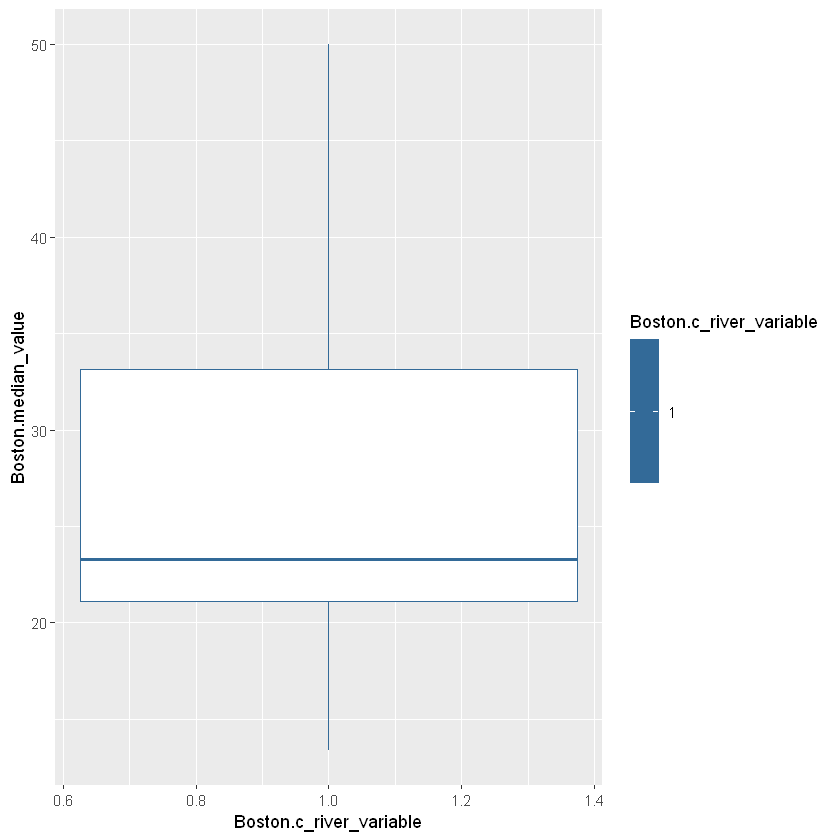

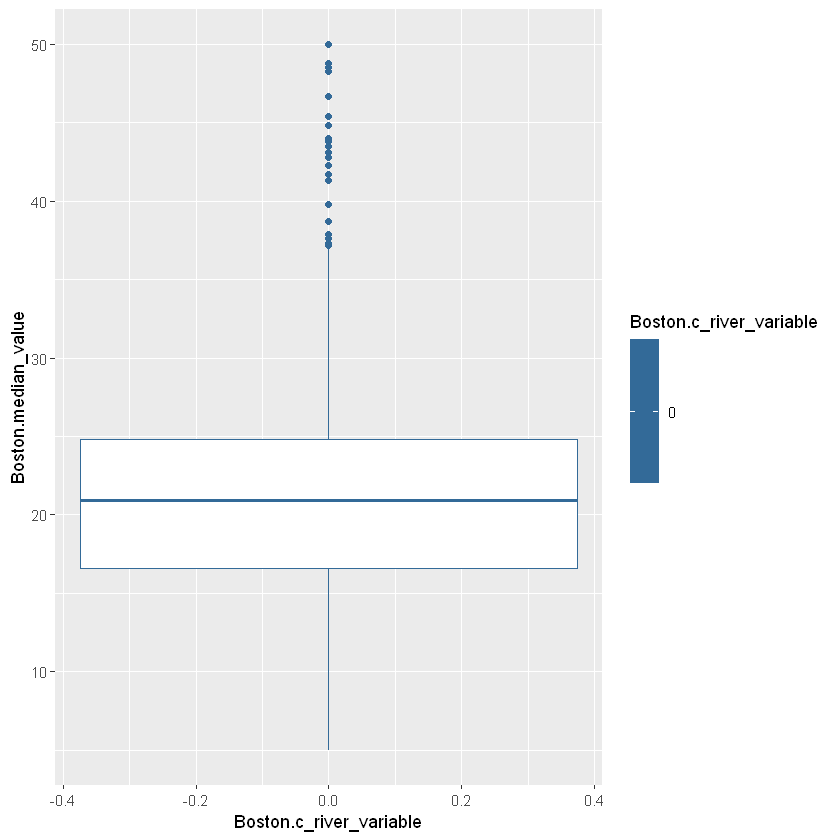

In [140]:
ggplot(data=Bostonrio, aes(x=Boston.c_river_variable, y=Boston.median_value, color=Boston.c_river_variable)) + geom_boxplot() 
ggplot(data=Bostonsinrio, aes(x=Boston.c_river_variable, y=Boston.median_value, color=Boston.c_river_variable)) + geom_boxplot() 

In [143]:
anova<-aov(BostonPCA$c_river_variable ~ BostonPCA$median_value)
summary(anova)

                        Df Sum Sq Mean Sq F value   Pr(>F)    
BostonPCA$median_value   1  1.001  1.0007   15.97 7.39e-05 ***
Residuals              504 31.578  0.0627                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Al intentar realizar una regresión lineal para predecir si había rio o no, está claro que iba a salir mal debido al tipo de variable. No es una variable cuantitativa y supongo que por casos de ese estilo no se ha obtenido buenos resultados al aplicar una regresión (R cuadrado de 0.065). Al representar varias veces los datos con ríos colindantes y sin ríos colindantes, se observa como las medias son diferentes, y los cuartiles también. En ambos casos presentan valores más elevados los “median_value” con ríos colindantes y para poder decir con certeza que esto es cierto finalmente, he optado por realizar el test anova con resultados buenos (respecto a mis primeros pensamientos). Según el test anova los datos con ríos colindantes son diferentes a los que no tienen rio colindante (p-value muy bajo, diferencia significativa). Esto nos confirma la hipotesis de que tener un rio colindante hace que la “median_value” se más elevada.